In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
data=df.copy()

In [9]:
data=data.fillna(data.mean(numeric_only=True))

In [10]:
data.isna().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [17]:
dist=data['City'].unique()
city_map= {city: i for i, city in enumerate(dist)}
data['City']=data['City'].map(city_map)

In [18]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,0,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,0,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,0,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,0,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,25,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,25,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,25,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [20]:
city_map

{'Ahmedabad': 0,
 'Aizawl': 1,
 'Amaravati': 2,
 'Amritsar': 3,
 'Bengaluru': 4,
 'Bhopal': 5,
 'Brajrajnagar': 6,
 'Chandigarh': 7,
 'Chennai': 8,
 'Coimbatore': 9,
 'Delhi': 10,
 'Ernakulam': 11,
 'Gurugram': 12,
 'Guwahati': 13,
 'Hyderabad': 14,
 'Jaipur': 15,
 'Jorapokhar': 16,
 'Kochi': 17,
 'Kolkata': 18,
 'Lucknow': 19,
 'Mumbai': 20,
 'Patna': 21,
 'Shillong': 22,
 'Talcher': 23,
 'Thiruvananthapuram': 24,
 'Visakhapatnam': 25}

In [25]:
dist1=data['AQI_Bucket'].dropna().unique()
aqi_map={aqi:i for i,aqi in enumerate(dist1)}
data['AQI_Bucket']=data['AQI_Bucket'].map(aqi_map)
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,0,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,0,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,0,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,0,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,5.0
29527,25,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,4.0
29528,25,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,4.0
29529,25,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,4.0


In [26]:
data['AQI_Bucket']=data['AQI_Bucket'].fillna(data['AQI_Bucket'].mean())

In [27]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,2.861207
1,0,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,2.861207
2,0,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,2.861207
3,0,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,2.861207
4,0,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,2.861207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,5.000000
29527,25,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,4.000000
29528,25,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,4.000000
29529,25,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,4.000000


In [29]:
data=data.drop('Date',axis=1)

In [30]:
data.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

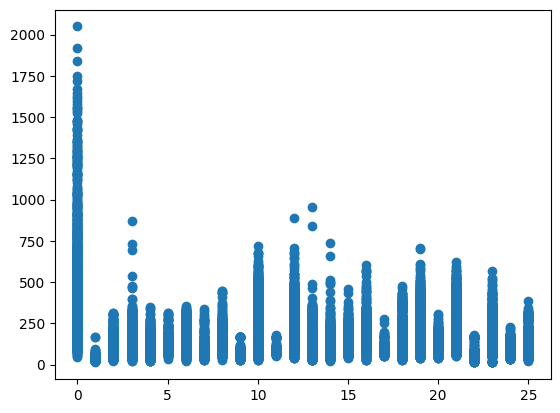

In [32]:
plt.scatter(x=data["City"],y=data["AQI"])
plt.show()

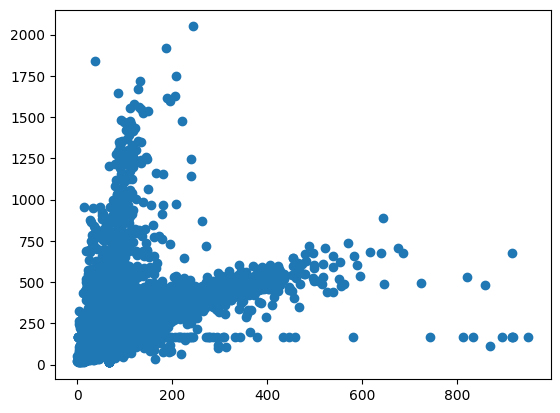

In [44]:
plt.scatter(x=data["PM2.5"],y=data["AQI"])
plt.show()

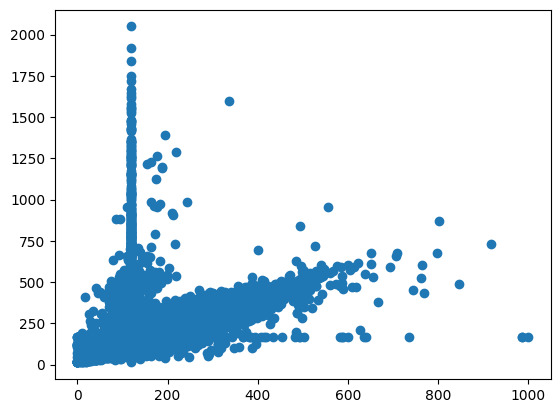

In [33]:
plt.scatter(x=data["PM10"],y=data["AQI"])
plt.show()

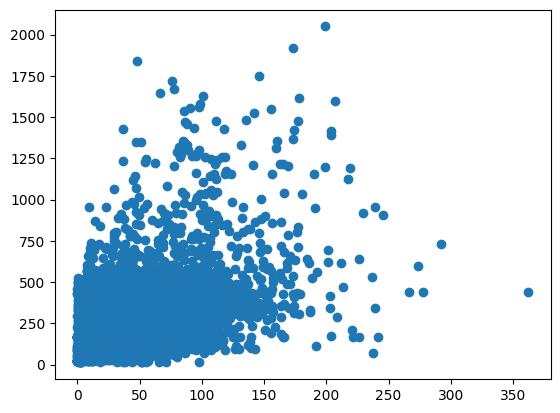

In [34]:
plt.scatter(x=data["NO2"],y=data["AQI"])
plt.show()

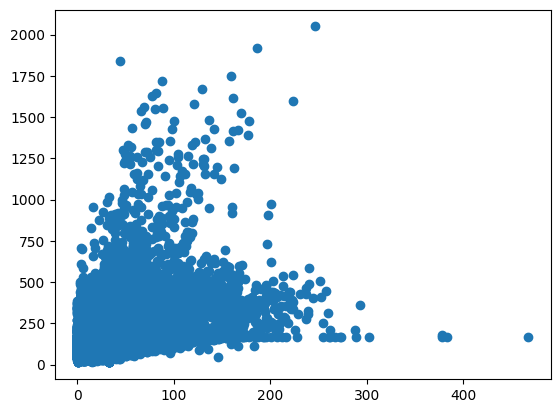

In [35]:
plt.scatter(x=data["NOx"],y=data["AQI"])
plt.show()

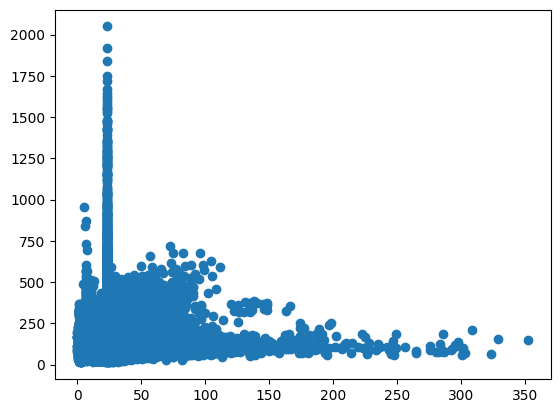

In [36]:
plt.scatter(x=data["NH3"],y=data["AQI"])
plt.show()

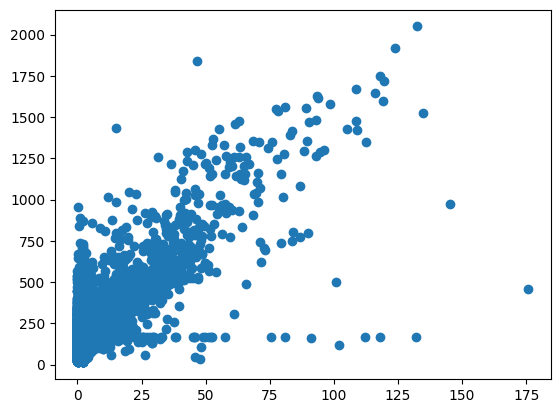

In [37]:
plt.scatter(x=data["CO"],y=data["AQI"])
plt.show()

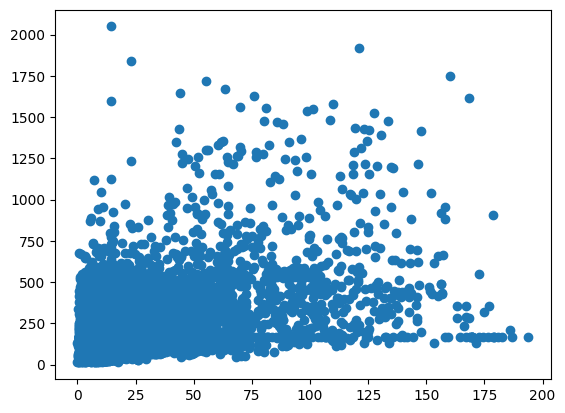

In [39]:
plt.scatter(x=data["SO2"],y=data["AQI"])
plt.show()

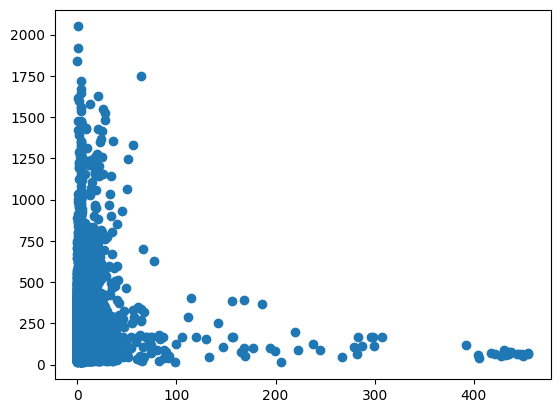

In [40]:
plt.scatter(x=data["Benzene"],y=data["AQI"])
plt.show()

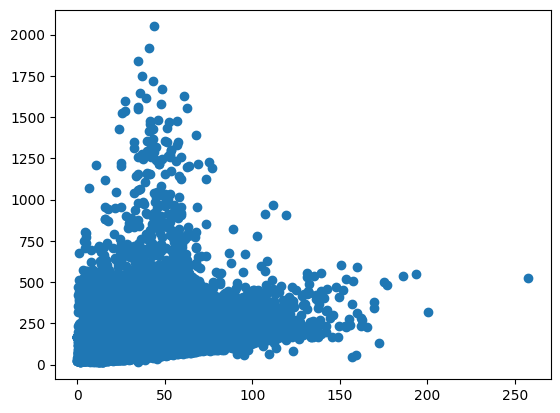

In [41]:
plt.scatter(x=data["O3"],y=data["AQI"])
plt.show()

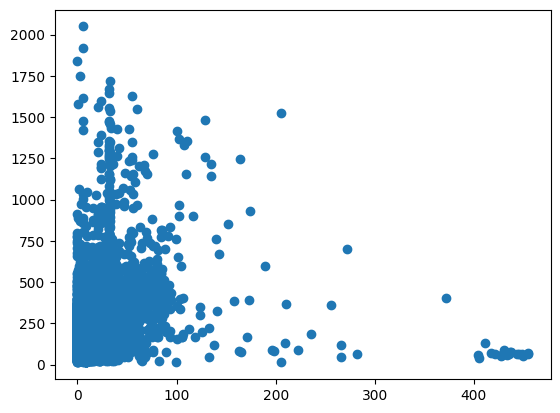

In [46]:
plt.scatter(x=data["Toluene"],y=data["AQI"])
plt.show()

In [48]:
features=data[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
labels=data['AQI']

In [49]:
features

,City,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene
0,0,67.450578,118.127103,0.92,18.22,17.15,0.92,27.64,133.36,0.00000,0.020000,0.000000
1,0,67.450578,118.127103,0.97,15.69,16.46,0.97,24.55,34.06,3.68000,5.500000,3.770000
2,0,67.450578,118.127103,17.40,19.30,29.70,17.40,29.07,30.70,6.80000,16.400000,2.250000
3,0,67.450578,118.127103,1.70,18.48,17.97,1.70,18.59,36.08,4.43000,10.140000,1.000000
4,0,67.450578,118.127103,22.10,21.42,37.76,22.10,39.33,39.31,7.01000,18.890000,2.780000
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.020000,50.940000,7.68,25.06,19.54,0.47,8.55,23.30,2.24000,12.070000,0.730000
29527,25,24.380000,74.090000,3.42,26.06,16.53,0.52,12.72,30.14,0.74000,2.210000,0.380000
29528,25,22.910000,65.730000,3.45,29.53,18.33,0.48,8.42,30.96,0.01000,0.010000,0.000000
29529,25,16.640000,49.970000,4.05,29.26,18.80,0.52,9.84,28.30,0.00000,0.000000,0.000000


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=2)

In [52]:
x_train.shape

(23624, 12)

In [53]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0,max_depth=5)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred=model.predict(x_test)

In [55]:
from sklearn.metrics import r2_score
r=r2_score(y_pred,y_test)
r

0.8140324519754725

In [56]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(y_pred,y_test)
err

2482.4591194924624